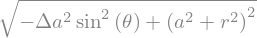

In [3]:
#this will function as a basic test for all the functionalities of the full sim. 
import sympy as sym
r, a, theta = sym.symbols('r,a,theta')
rho, Delta, Sigma = sym.symbols('rho, Delta, Sigma')
Sigma = sym.sqrt((r**2 + a**2)**2 - a**2 * Delta * (sym.sin(theta))**2)
Sigma

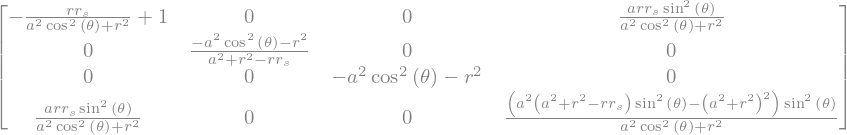

In [9]:
# #from einsteinpy.metric.kerrnewman import KerrNewman
import sympy
import numpy as np
#from einsteinpy.geodesic import Geodesic, Timelike, Nulllike
from einsteinpy.symbolic.predefined import Kerr, KerrNewman
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols
sympy.init_printing()
# TestDiff = BoyerLindquistDifferential(0 , 4, np.pi /2, 0)
# TestCoords = BoyerLindquistConversion(0, 4, np.pi / 2, 0)
# TestMetric = KerrNewman(TestDiff,M = 1, q=0, Q = 0, a=.99)
TestMetric1 = Kerr(c=1)
#print(TestMetric1.tensor())
TestMetric2 = KerrNewman(c=1, Q = 0)
TestMetric2.tensor()

#print(TestMetric2.symbols())
#chrst = ChristoffelSymbols.from_metric(TestMetric1)
#chrst.tensor()
#TestMetric2




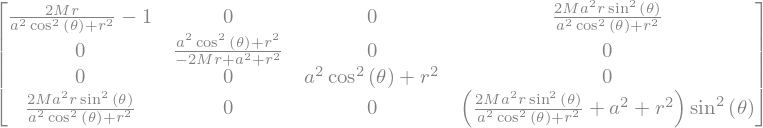

In [35]:
import sympy
#from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor
#lets define the kerr metric tensor ourselves using the definition in the book
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, Tensor
#c= G = 1 coords
syms = sympy.symbols("t r theta phi")
M, a = sympy.symbols("M a") #grav constant, mass,  kerr parameter
params = sympy.symbols("rho Delta")
kerrlist2d = [[0 for i in range(4)] for i in range(4)]
kerrlist2d[0][0] = - (1 - (2 * M * syms[1]) / params[0]**2)
kerrlist2d[1][1] = params[0]**2 / params[1]
kerrlist2d[2][2] = params[0]**2
kerrlist2d[3][3] = (syms[1]**2 + a**2 + ((2 * M * syms[1] * a**2 * (sym.sin(syms[2]))**2) / params[0]**2)) * (sym.sin(syms[2]))**2
kerrlist2d[0][3] = ((2 * M * syms[1] * a**2 * (sym.sin(syms[2]))**2) / params[0]**2)
kerrlist2d[3][0] = ((2 * M * syms[1] * a**2 * (sym.sin(syms[2]))**2) / params[0]**2)
krr = MetricTensor(kerrlist2d, syms)
krrsubparams = krr.subs([(params[0], sym.sqrt(r**2 +a**2 * (sym.cos(syms[2]))**2)), (params[1], r**2 - 2 * M * syms[1]  + a**2)])
krrsubparams.tensor()



In [16]:
#lets try recreating some of the basic examples: 
import numpy as np

from einsteinpy.geodesic import Nulllike
from einsteinpy.plotting.geodesic import StaticGeodesicPlotter

position = [2.5, np.pi / 2, 0.]
momentum = [0., 0., -2.]
a = 0.99
steps = 7440  # As close as we can get before the integration becomes highly unstable
delta = 0.0005
omega = 0.01
suppress_warnings = True

In [17]:
#run the geodesic code
geod = Nulllike(
    metric="Kerr",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=True,
    omega=omega,
    suppress_warnings=suppress_warnings
)

In [26]:

posmom= geod.trajectory[1]
pos = posmom[:,:4]
pos


array([[ 6.69634516e-04,  2.49999998e+00, -1.46505775e-04,
         1.53080849e-16],
       [ 1.33926906e-03,  2.49999993e+00, -2.93011539e-04,
         1.53080847e-16],
       [ 2.00890364e-03,  2.49999984e+00, -4.39517283e-04,
         1.53080842e-16],
       ...,
       [ 3.53682135e+01, -1.28354325e-01, -1.14273055e+00,
         7.04120778e-17],
       [ 3.63572005e+01,  3.54530702e-01, -1.09320257e+00,
         7.03714884e-17],
       [ 3.75555692e+01,  8.47620442e-01, -7.75392098e-01,
         7.03424297e-17]])